In [1]:
import sys
sys.path.append("/mnt/c/Users/dambr/Desktop/AstroCosmoComputational/Students/Anna_DAmbrosio/")

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})
#Import pyACC logger
#from pyACC.helpers import Logger

# Set the logger
#print = Logger("NFW profile")

# Import integration class
from pyACC.Calculus import intgr

# Navarro Frenk & White profile

The Navarro-Frenk-White (NFW) profile is a model that describes the density profile of dark matter haloes. 

Derived from cosmological simulations, this model proved to be apt to describe halos of different sizes,
from galaxies to the largest galaxy clusters.

The formula for the NFW profile is given by:

$$
\rho(r) = \frac{\rho_0}{\frac{r}{r_s}\left(1 + \frac{r}{r_s}\right)^2}
$$

where:
- $\rho_0$ is the characteristic density,
- $r_s$ is the scale radius, the radius at which the slope of the profile changes.

Let's implement this!

In [2]:
# Implement the Navarro-Frenk-White profile and documentation
def NFW_profile(r, rho0, rs):
    '''
    Navarro Frenk & White profile

    Parameters
    ----------
    r: float or array
       distance from the centre of the halos
    rs: float
        the scale radius, the radius at which the slope of the profile changes
    rho0: float
          characteristic density

    Returns
    -------
    float or array
        density profile of dark matter haloes
    '''

     
    return rho0/((r/rs)*(1+(r/rs))**2)

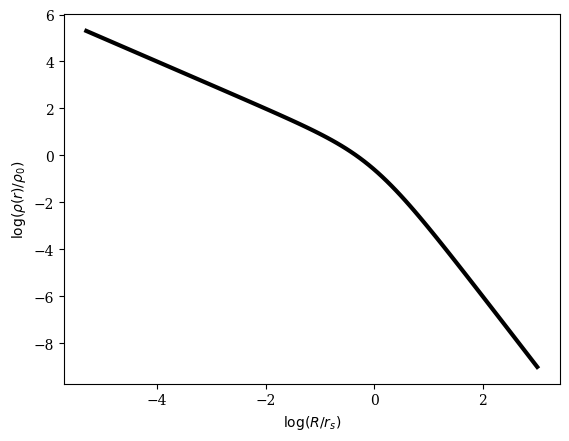

In [3]:
# Radius in Mpc
r = np.logspace(-4, np.log10(20000), 100) # in Kpc

# Scale radius in Kpc
rs = 20.0
# Central density in M_sun / Kpc^3
rho0 = 1e7

# Calculate the density profile
rho = NFW_profile(r, rho0, rs)

# Plot!
plt.plot(np.log10(r/rs), np.log10(rho/rho0), label="NFW profile", color="k", lw=3)
plt.xlabel(r"$\log(R/r_s)$")
plt.ylabel(r"$\log(\rho(r)/\rho_0)$");

## Compute the enclosed mass

Let's compute the enclosed mass:

$$ M(<r) = 4 \pi \int_{r_{min}}^r \mathrm{d}r' r'^2 \rho(r') $$

In [4]:
# Compute the enclosed mass 
def M_enclosed(r, rho0, rs):
    """
    Enclosed mass

    Parameters
    ----------
    r : float or array
        Radius
    rho0 : float
        Central density
    rs : float
        Scale radius
    
    Returns
    -------
    float
        Enclosed mass at radius r
    """

    return 4 * np.pi * rho0 * rs**3 * (np.log((r + rs) / rs) - r / (r + rs))

In [5]:
# Compute the enclosed mass by integration
# Implement 
def M_enclosed_integrand(r, rho0, rs):
   """
    Enclosed mass integrand

    Parameters
    ----------
    r : array
        Radius
    rho0 : float
        Central density
    rs : float
        Scale radius
    
    Returns
    -------
    array
        Enclosed mass integrand at radius r
    """
   return 4 * np.pi * r**2 * NFW_profile(r, rho0, rs)

The integration is via scipy.integrate.quad
The integration is via scipy.integrate.quad
The integration is via scipy.integrate.quad
The integration is via scipy.integrate.quad
The integration is via scipy.integrate.quad
The integration is via scipy.integrate.quad
The integration is via scipy.integrate.quad
The integration is via scipy.integrate.quad
The integration is via scipy.integrate.quad
The integration is via scipy.integrate.quad
The integration is via scipy.integrate.quad
The integration is via scipy.integrate.quad
The integration is via scipy.integrate.quad
The integration is via scipy.integrate.quad
The integration is via scipy.integrate.quad
The integration is via scipy.integrate.quad
The integration is via scipy.integrate.quad
The integration is via scipy.integrate.quad
The integration is via scipy.integrate.quad
The integration is via scipy.integrate.quad
The integration is via scipy.integrate.quad
The integration is via scipy.integrate.quad
The integration is via scipy.int

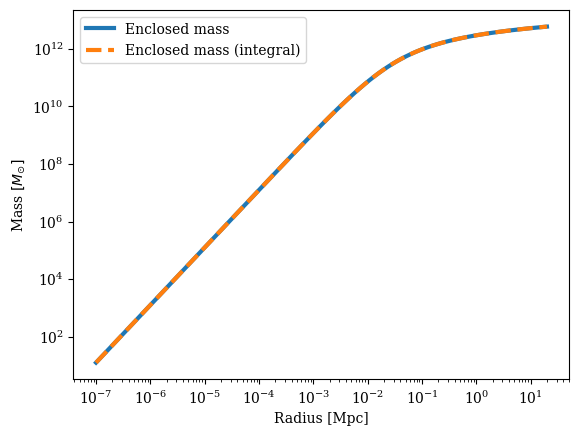

In [8]:
# Compute enclosed mass
enclosed_mass_analytic = M_enclosed(r, rho0, rs)

# Compute enclosed mass by integration
enclosed_mass_integrated = np.zeros(r.size)
M_enclosed_func = lambda R: M_enclosed_integrand(R, rho0, rs)
for i,radius in enumerate (r): 
    enclosed_mass_integrated[i] = intgr(M_enclosed_func,0,radius)[0]

# Compute the enclosed mass at radius r

plt.loglog(r/1.e3, enclosed_mass_integrated, label="Enclosed mass", lw=3)
plt.loglog(r/1.e3, enclosed_mass_analytic, ls="--", label="Enclosed mass (integral)", lw=3)

plt.legend()
plt.xlabel("Radius [Mpc]")
plt.ylabel("Mass $[M_{\odot}]$");

## Play with numbers, use your imagination!